In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [77]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\helit\AppData\Roaming\nltk_data...


True

In [66]:
df = pd.read_csv("dataset/windows10comments.csv", sep=';', index_col=[0])

In [67]:
df.head()

,text,date
0,"Mielőtt kommentelsz, olvasd el az Összefoglaló...",\n\t\t\t\t\t\t\tUtoljára frissítve: 2020-05-31...
1,Windows 9A Microsoft a híresztelések szerint a...,\n2014-07-02 20:43:20\n
2,"Az a start menü jól néz ki, meg a metro appok ...",\n2014-07-02 20:48:30\n
3,Nekem nem tetszik annyira... hiányolom a kikap...,\n2014-07-02 20:53:41\n
4,Ott a shut down a képen,\n2014-07-02 20:54:13\n


In [68]:
df = df[df["date"].str.contains('Utoljára frissítve')==False]

In [69]:
print(f"Length:\n{len(df)}\n")
print(f"dtypes:\n{df.dtypes}\n")
print(f"NaN rows:\n{df.isna().sum()}")

Length:
146076

dtypes:
text    object
date    object
dtype: object

NaN rows:
text    516
date      0
dtype: int64


In [70]:
df = df.replace('\n','', regex=True)

In [71]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

text            object
date    datetime64[ns]
dtype: object


In [72]:
df = df.reset_index(drop=True)

In [73]:
df

,text,date
0,Windows 9A Microsoft a híresztelések szerint a...,2014-07-02 20:43:20
1,"Az a start menü jól néz ki, meg a metro appok ...",2014-07-02 20:48:30
2,Nekem nem tetszik annyira... hiányolom a kikap...,2014-07-02 20:53:41
3,Ott a shut down a képen,2014-07-02 20:54:13
4,"Sokaknak megkönnyebbülés lesz az új W9, bár én...",2014-07-02 20:55:30
...,...,...
146071,"Köszi, a jelzett frissítések rendben vannak, a...",2023-01-04 11:20:47
146072,"Végülis nem tudtam megakadályozni, hogy feltel...",2023-01-04 13:32:01
146073,"Adatmentő / visszaállító kérdés, de hátha itt ...",2023-01-04 14:01:34
146074,"A másik topikban már kaptál válaszokat, linkel...",2023-01-04 14:26:52


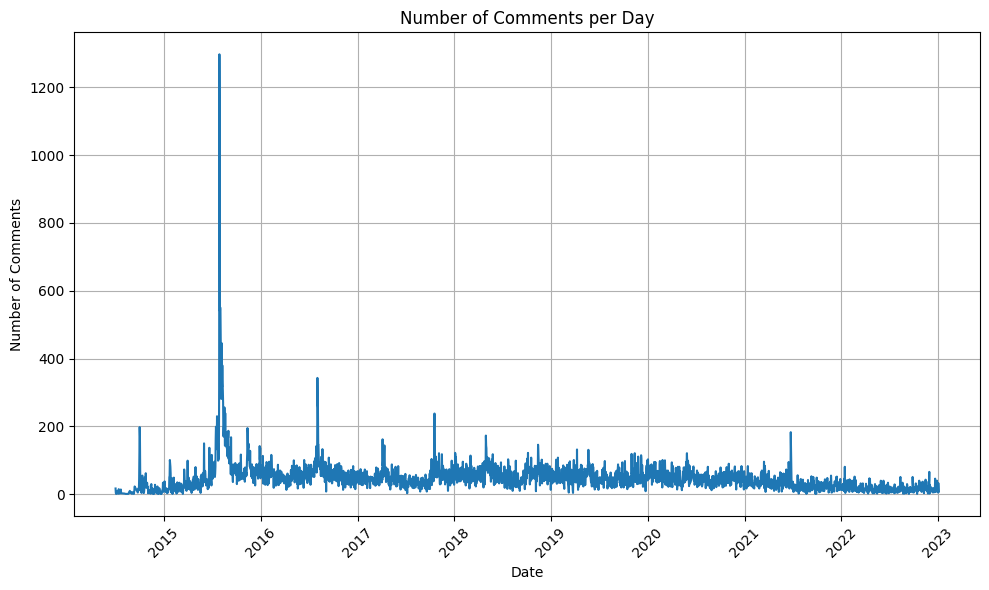

In [74]:
comments_per_day = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 6))
comments_per_day.plot(linestyle='-')
plt.title('Number of Comments per Day')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

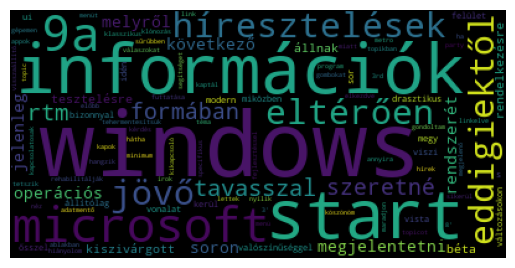

In [75]:
stop = set(stopwords.words('hungarian'))
df['text'] = df['text'].apply(lambda x: str(x) if isinstance(x, (str, np.generic)) else '')
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word not in stop]))

text = df['text_no_sw'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [78]:
# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['text_no_sw'].apply(lambda x: sid.polarity_scores(x)['compound'])

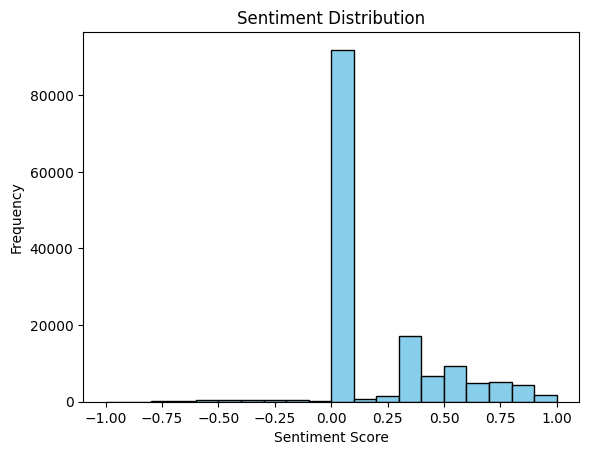

In [79]:
# Plotting sentiment distribution
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

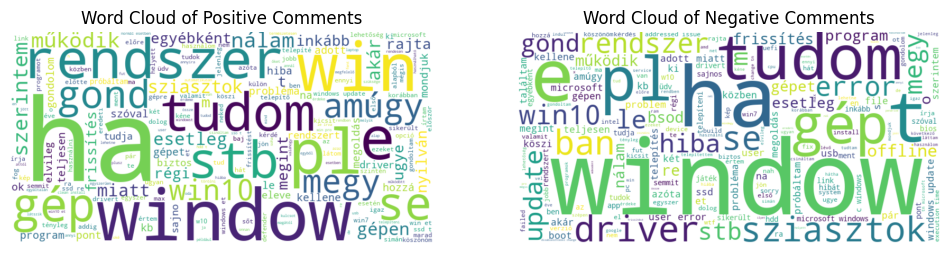

In [82]:
# Word cloud of positive and negative comments
positive_comments = ' '.join(df[df['sentiment'] > 0]['text_no_sw'])
negative_comments = ' '.join(df[df['sentiment'] < 0]['text_no_sw'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Comments')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Comments')
plt.axis('off')

plt.show()